In [299]:
# Packages
import pandas as pd
from scipy.io import arff
import pandas as pd
import numpy as np

#pip install minisom

URV                                                                            MESIIA

Neural and Evolutionary Computation (NEC)
Assignment 3: Unsupervised learning with PCA, t-SNE, k-means, AHC and SOM

Teachers: Dr. Jordi Duch, Dr. Sergio Gomez

Student: Natzaret Gálvez Rísquez

Part 1: Selecting and analyzing the datasets

The unsupervised learning techniques must be applied on two datasets:

In [300]:
# We upload the datasets

# First dataset: File: A3-data.txt
    # Features: 4 variables, 1 class
    # Patterns: 360 patterns
data = pd.read_csv('C:/Users/Gari/Desktop/Assignments_NEC/A3/A3-data.txt', sep=',', header=None)
header_vector_data = data.iloc[0, :].tolist() #header
df_data = pd.DataFrame(data.iloc[1:, :-1])
class_data = pd.DataFrame(data.iloc[1:, -1])

# Second dataset: from "https://www.openml.org/search?type=data&status=active&id=188"
    # Features: at least 6 variables, and a class attribute
    # The class attribute must refer to, at least, 4 different classes
    #  Patterns: at least 200 patterns
data_Eucaliptus, meta = arff.loadarff('C:/Users/Gari/Desktop/Assignments_NEC/A3/dataset_194_eucalyptus.arff')
# Convert numpy array to DataFrame
# [736 rows x 20 columns], number of classes 5
dataframe_Eucaliptus = pd.DataFrame(data_Eucaliptus)
df_Eucaliptus = dataframe_Eucaliptus.iloc[:, :-1]
class_eucaliptus = dataframe_Eucaliptus.iloc[:, -1]

In [301]:
print(meta) # Details of the second dataset

Dataset: eucalyptus
	Abbrev's type is nominal, range is ('Cra', 'Cly', 'Nga', 'Wai', 'K81', 'Wak', 'K82', 'WSp', 'K83', 'Lon', 'Puk', 'Paw', 'K81a', 'Mor', 'Wen', 'WSh')
	Rep's type is numeric
	Locality's type is nominal, range is ('Central_Hawkes_Bay', 'Northern_Hawkes_Bay', 'Southern_Hawkes_Bay', 'Central_Hawkes_Bay_(coastal)', 'Central_Wairarapa', 'South_Wairarapa', 'Southern_Hawkes_Bay_(coastal)', 'Central_Poverty_Bay')
	Map_Ref's type is nominal, range is ('N135_382/137', 'N116_848/985', 'N145_874/586', 'N142_377/957', 'N158_344/626', 'N162_081/300', 'N158_343/625', 'N151_912/221', 'N162_097/424', 'N166_063/197', 'N146_273/737', 'N141_295/063', 'N98_539/567', 'N151_922/226')
	Latitude's type is nominal, range is ('39__38', '39__00', '40__11', '39__50', '40__57', '41__12', '40__36', '41__08', '41__16', '40__00', '39__43', '82__32')
	Altitude's type is numeric
	Rainfall's type is numeric
	Frosts's type is numeric
	Year's type is numeric
	Sp's type is nominal, range is ('co', 'fr', '

In [302]:
print(dataframe_Eucaliptus) # Details of the second dataset

     Abbrev  Rep                Locality          Map_Ref   Latitude  \
0    b'Cra'  1.0   b'Central_Hawkes_Bay'  b'N135_382/137'  b'39__38'   
1    b'Cra'  1.0   b'Central_Hawkes_Bay'  b'N135_382/137'  b'39__38'   
2    b'Cra'  1.0   b'Central_Hawkes_Bay'  b'N135_382/137'  b'39__38'   
3    b'Cra'  1.0   b'Central_Hawkes_Bay'  b'N135_382/137'  b'39__38'   
4    b'Cra'  1.0   b'Central_Hawkes_Bay'  b'N135_382/137'  b'39__38'   
..      ...  ...                     ...              ...        ...   
731  b'WSh'  1.0  b'Southern_Hawkes_Bay'  b'N151_922/226'  b'40__36'   
732  b'WSh'  1.0  b'Southern_Hawkes_Bay'  b'N151_922/226'  b'40__36'   
733  b'WSh'  1.0  b'Southern_Hawkes_Bay'  b'N151_922/226'  b'40__36'   
734  b'WSh'  1.0  b'Southern_Hawkes_Bay'  b'N151_922/226'  b'40__36'   
735  b'WSh'  1.0  b'Southern_Hawkes_Bay'  b'N151_922/226'  b'40__36'   

     Altitude  Rainfall  Frosts    Year     Sp   PMCno    DBH     Ht  Surv  \
0       100.0     850.0    -2.0  1980.0  b'co'  1520.0  1

Part 2: Comparing unsupervised learning algorithms

We are going to perform unsupervised learning of the two datasets using the following algorithms:
PCA, t-SNE, k-means, AHC and SOM

In [303]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def apply_pca(data, labels, n_components=2):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data)

    # Scatter plot of the first two principal components
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Projection')
    plt.colorbar()
    plt.show()

    # Scree plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot')
    plt.grid(True)
    plt.show()

In [304]:
# t-SNE
from sklearn.manifold import TSNE

def apply_tsne(data, labels, perplexity=30):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsne_result = tsne.fit_transform(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title(f't-SNE Projection (Perplexity={perplexity})')
    plt.colorbar()
    plt.show()

In [305]:
# k-means
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def apply_kmeans(data, labels, k):
# Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(scaled_data)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_data)
    
    # Scatter plot of the data colored according to the true classes
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('True Classes')
    plt.colorbar()
    plt.show()
    
    # Scatter plot of the data colored according to the clusters obtained by K-means
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-means Clustering (k={k})')
    plt.colorbar()
    plt.show()
    
    # Compare with the real class labels
    if k == len(np.unique(labels)):
        cm = confusion_matrix(labels, cluster_labels)
        print("Confusion Matrix:")
        print(cm)

In [306]:
# AHC
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Method UPGMA -> method average
def apply_ahc(data, labels, method='average'):
    # Calculate Euclidean distances between original patterns
    data_numeric = data.apply(pd.to_numeric)

    # Calculate linkage matrix
    linkage_matrix = linkage(data_numeric, method=method)

    # Plot dendrogram with colors representing original classes
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, 
               color_threshold=0, 
               labels=labels,
               leaf_font_size=10,
               above_threshold_color='k')
    plt.title(f'Agglomerative Hierarchical Clustering ({method.capitalize()} Linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

In [307]:
# SOM
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

def apply_som(data, labels, mapsize=(10, 10), topology='rectangular', learning_rate=0.02, neighborhood_function='gaussian'):
    # Ensure at least 100 neurons
    if mapsize[0] * mapsize[1] < 100:
        raise ValueError("Number of neurons is less than 100. Please choose a larger mapsize.")

    # Convert DataFrame to numpy array
    data_array = data.to_numpy()

    # Normalize the data
    data_normalized = (data_array - data_array.min(axis=0)) / (data_array.max(axis=0) - data_array.min(axis=0))

    # Train the SOM
    som = MiniSom(mapsize[0], mapsize[1], data_array.shape[1], sigma=0.3, learning_rate=learning_rate, topology=topology, neighborhood_function=neighborhood_function)
    som.train_random(data_normalized, 100)

    # Plot component planes
    plt.figure(figsize=(12, 8))
    plt.suptitle('Component Planes')
    for i in range(data.shape[1]):  # Loop over the number of features
        plt.subplot(1, data.shape[1], i+1)  # Ensure each feature gets its own subplot
        plt.title(f'Feature {i+1}')
        plt.cla()  # Clear the current axes
        # Adjust the color bar scale and set ticks and labels
        vmin = np.min(som.get_weights()[:, :, i])
        vmax = np.max(som.get_weights()[:, :, i])
        plt.pcolor(som.get_weights()[:, :, i].T, cmap='viridis', vmin=vmin, vmax=vmax)
        plt.colorbar(ticks=np.linspace(vmin, vmax, num=5), label='Feature Value')  # Adjust the number of ticks as needed
    plt.show()

    # Plot U-matrix
    plt.figure(figsize=(10, 8))
    umatrix = som.distance_map()
    plt.pcolor(umatrix, cmap='viridis')
    plt.colorbar()
    plt.title('U-matrix')
    plt.show()

    # Find the best matching units (BMUs) for each data point
    bmus = np.array([som.winner(x) for x in data])

    # Calculate the most represented class for each position
    most_represented_class = np.zeros(som.get_weights().shape[:2])
    for i, j in np.ndindex(som.get_weights().shape[:2]):
        indices = np.where(np.all(bmus == (i, j), axis=1))[0]  # Extract the first element from the tuple returned by np.where
        if len(indices) > 0:
            unique_labels, label_counts = np.unique(labels[indices], return_counts=True)
            most_represented_class[i, j] = unique_labels[np.argmax(label_counts)]


    # Plot heatmap of the most represented class in each position
    plt.figure(figsize=(10, 8))
    plt.imshow(most_represented_class, cmap='viridis')
    plt.colorbar(label='Class')
    plt.title('Heatmap of the Most Represented Class')

    plt.show()

Dataset 1: data

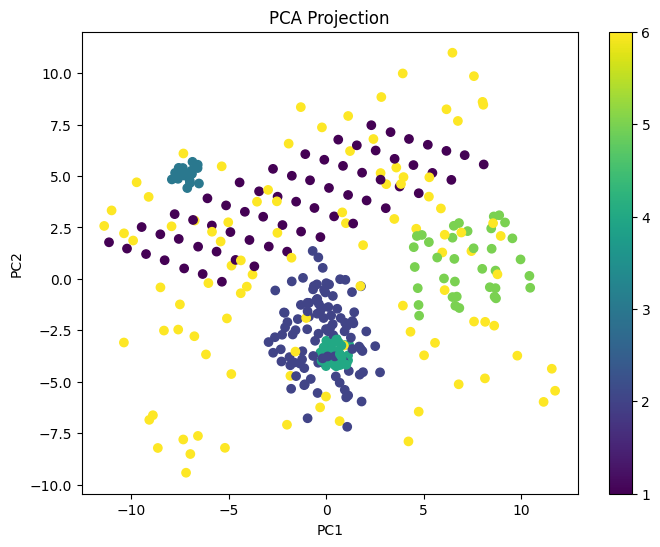

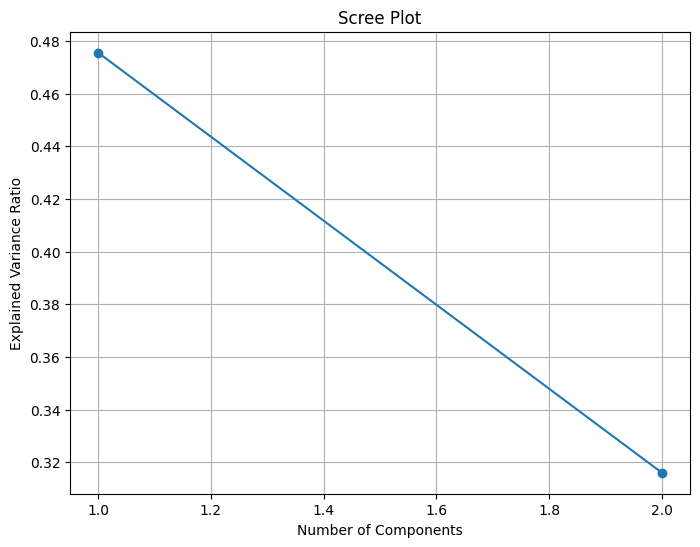

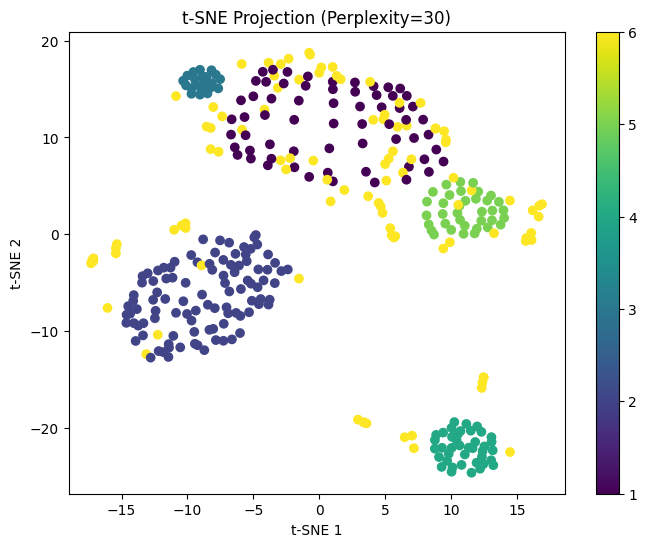

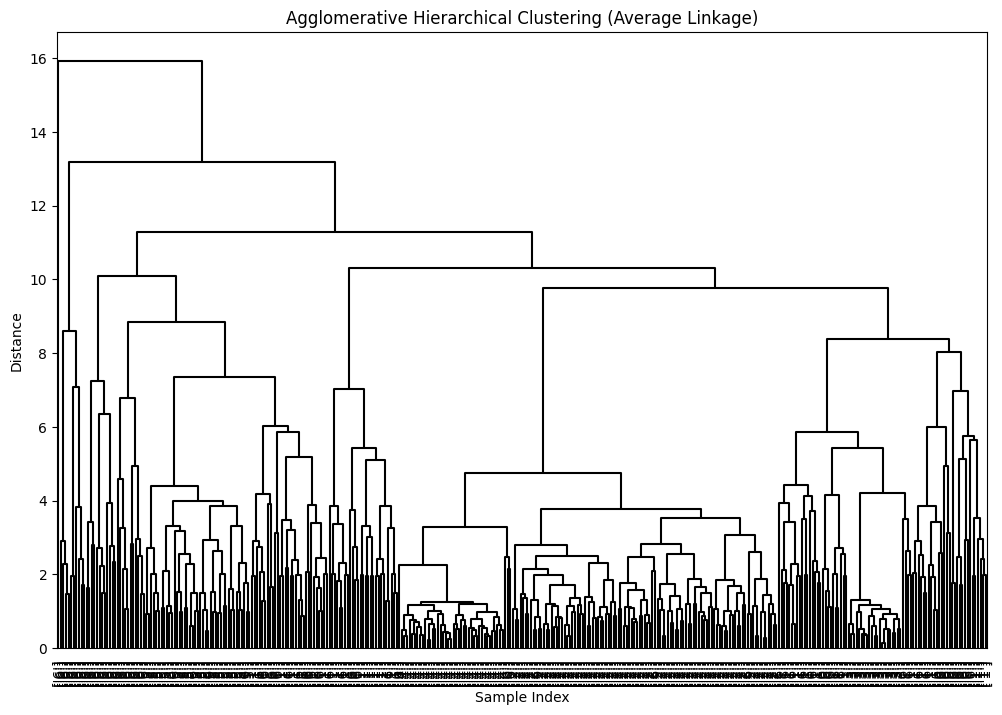

c:\Users\Gari\Desktop\NEC\projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


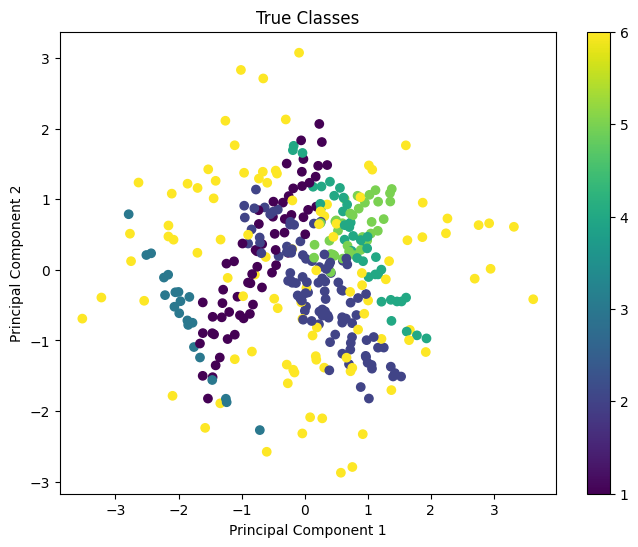

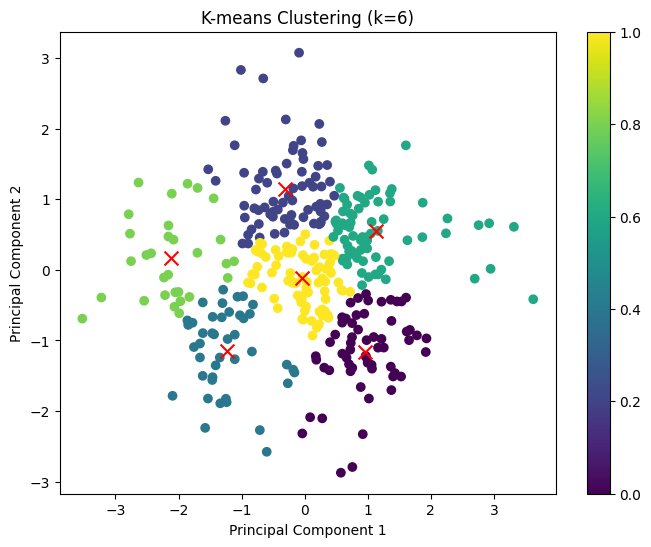

Confusion Matrix:
[[ 0  0  0  0  0  0  0]
 [ 0 26 22  0  2 13  0]
 [31 16  0  3  0 50  0]
 [ 0  0  9  0 12  0  0]
 [ 9  9  0 22  0  0  0]
 [ 0  1  0 27  0  8  0]
 [20 20 11 21 16 12  0]]


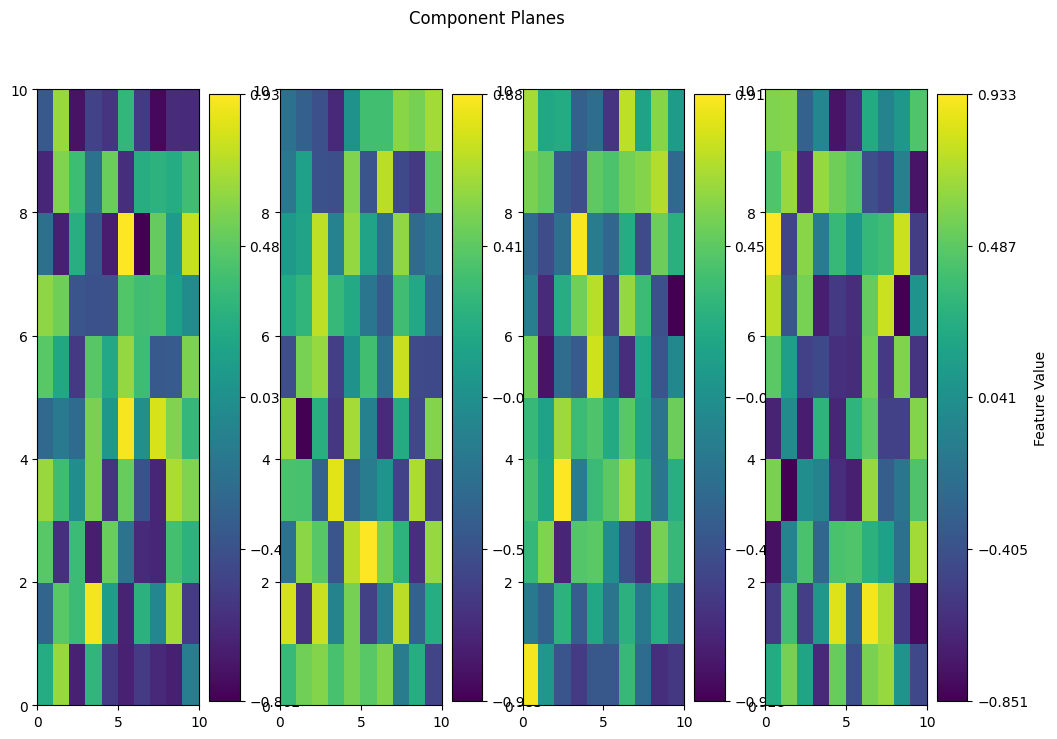

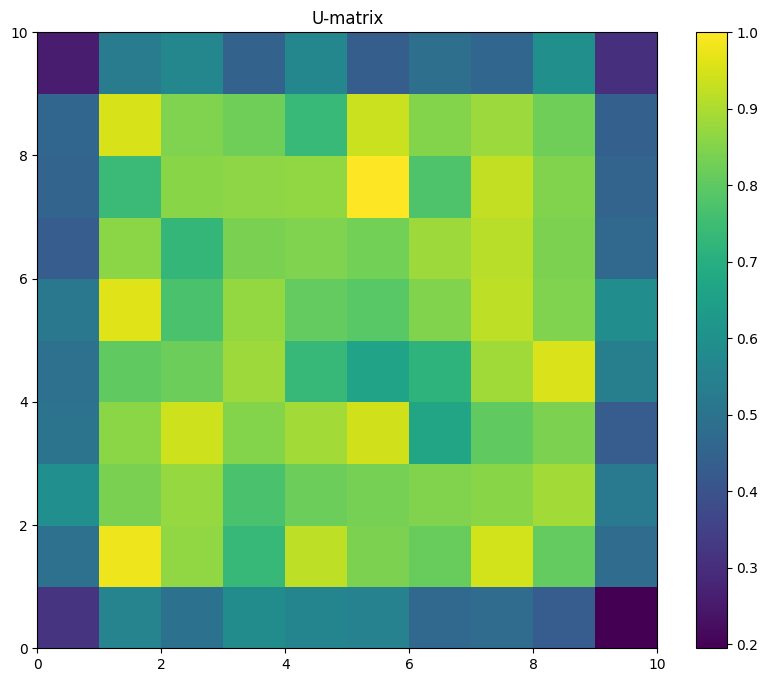

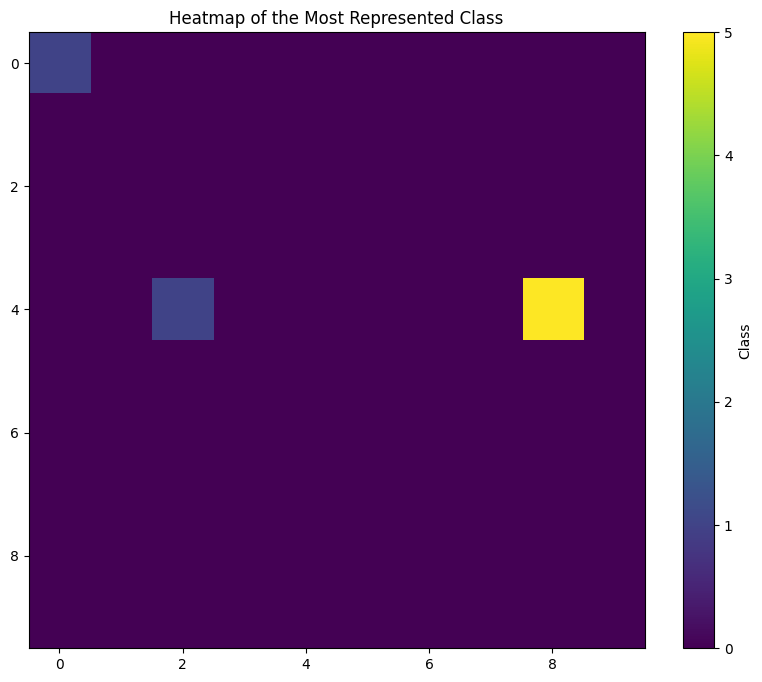

In [308]:
labels = class_data.values
labelsKmeans = labels.flatten()
data_array = df_data.to_numpy()
apply_pca(df_data, labels)
apply_tsne(df_data, labels)
apply_ahc(df_data, labels)
apply_kmeans(data_array, labelsKmeans.astype(int), k=6)
numeric_data = df_data.apply(pd.to_numeric)
apply_som(numeric_data, labels)

Dataset 2: eucaliptus

In [309]:
from sklearn.preprocessing import LabelEncoder

# We convert the non-numerical values into numerical

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to class_eucaliptus
class_eucaliptus = label_encoder.fit_transform(class_eucaliptus)

# Apply label encoding to each column in df_Eucaliptus
for column in df_Eucaliptus.columns:
    if df_Eucaliptus[column].dtype == 'object':
        df_Eucaliptus[column] = label_encoder.fit_transform(df_Eucaliptus[column])

In [310]:
# Check for NaN values in the DataFrame
#print("Number of NaN values before imputation:")
#print(df_Eucaliptus.isna().sum())

# Impute missing values with column-wise median
df_Eucaliptus_imputed = df_Eucaliptus.fillna(df_Eucaliptus.median())

# Check for NaN values in the DataFrame after imputation
print("\nNumber of NaN values after imputation:")
print(df_Eucaliptus_imputed.isna().sum())


Number of NaN values after imputation:
Abbrev      0
Rep         0
Locality    0
Map_Ref     0
Latitude    0
Altitude    0
Rainfall    0
Frosts      0
Year        0
Sp          0
PMCno       0
DBH         0
Ht          0
Surv        0
Vig         0
Ins_res     0
Stem_Fm     0
Crown_Fm    0
Brnch_Fm    0
dtype: int64


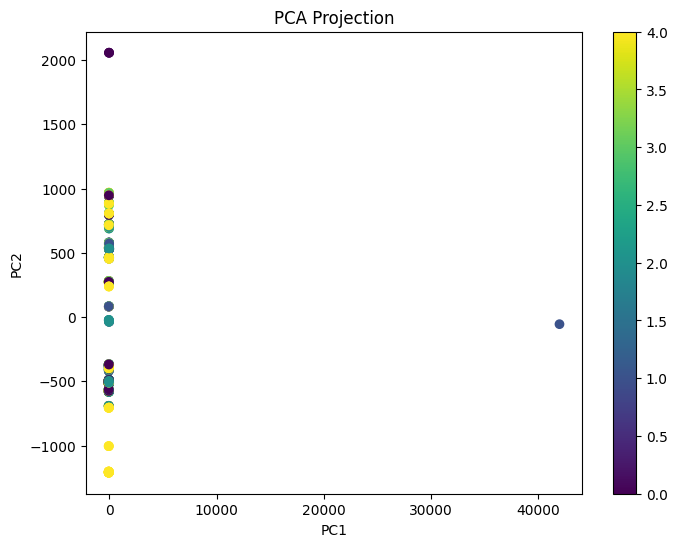

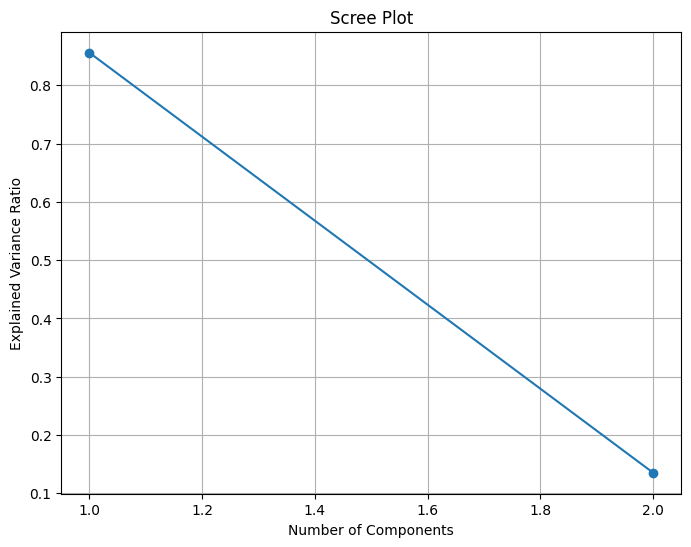

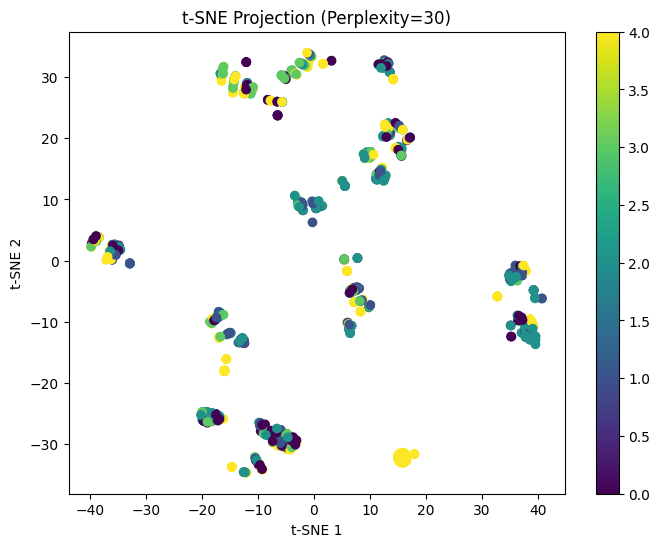

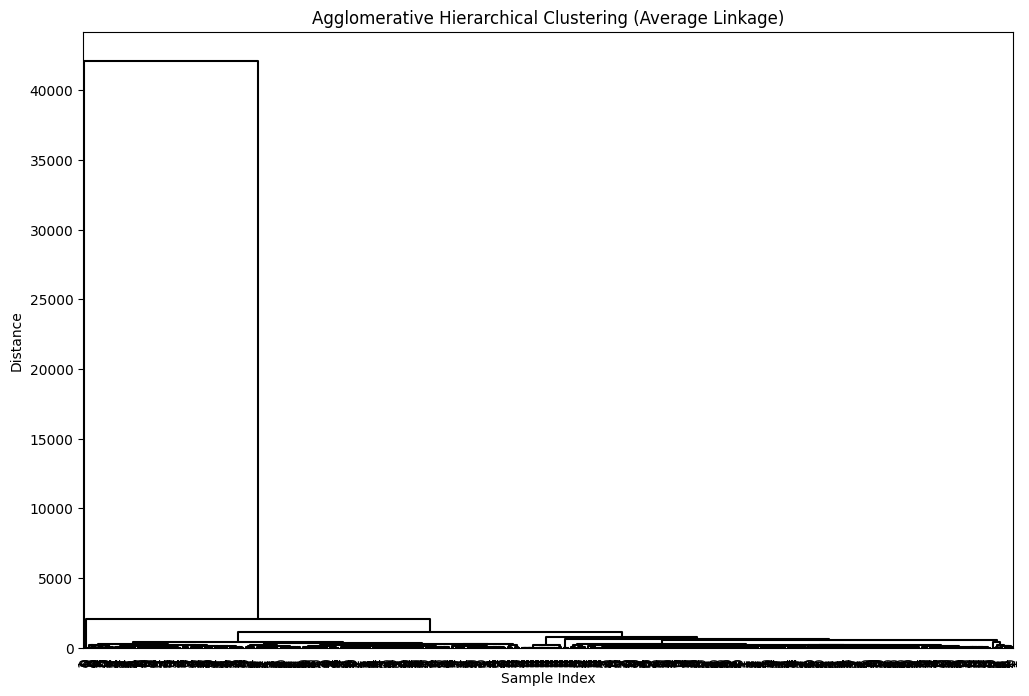

c:\Users\Gari\Desktop\NEC\projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


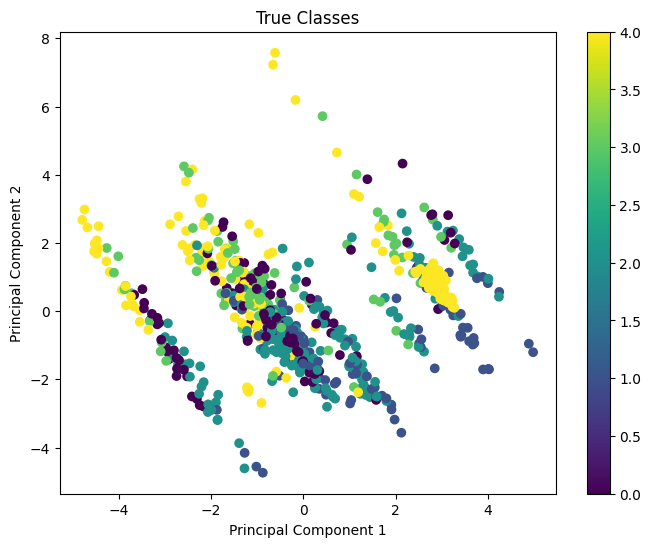

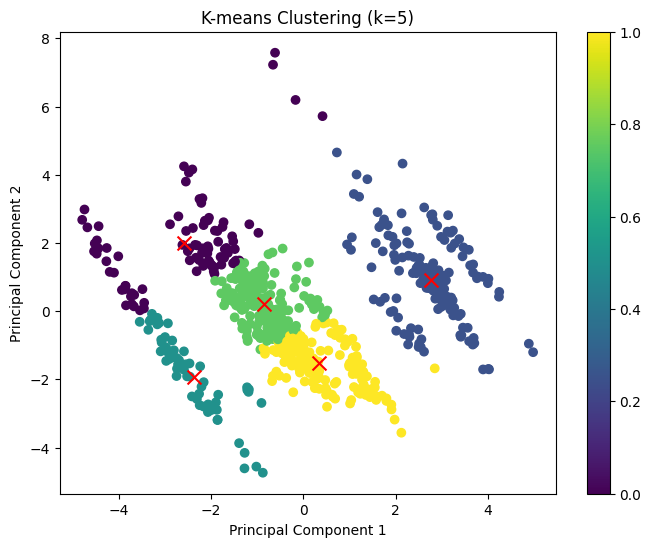

Confusion Matrix:
[[ 9 13 20 57 31]
 [ 1 35  5 19 45]
 [ 2 38 23 52 99]
 [26 22  4 49  6]
 [57 74  8 35  6]]


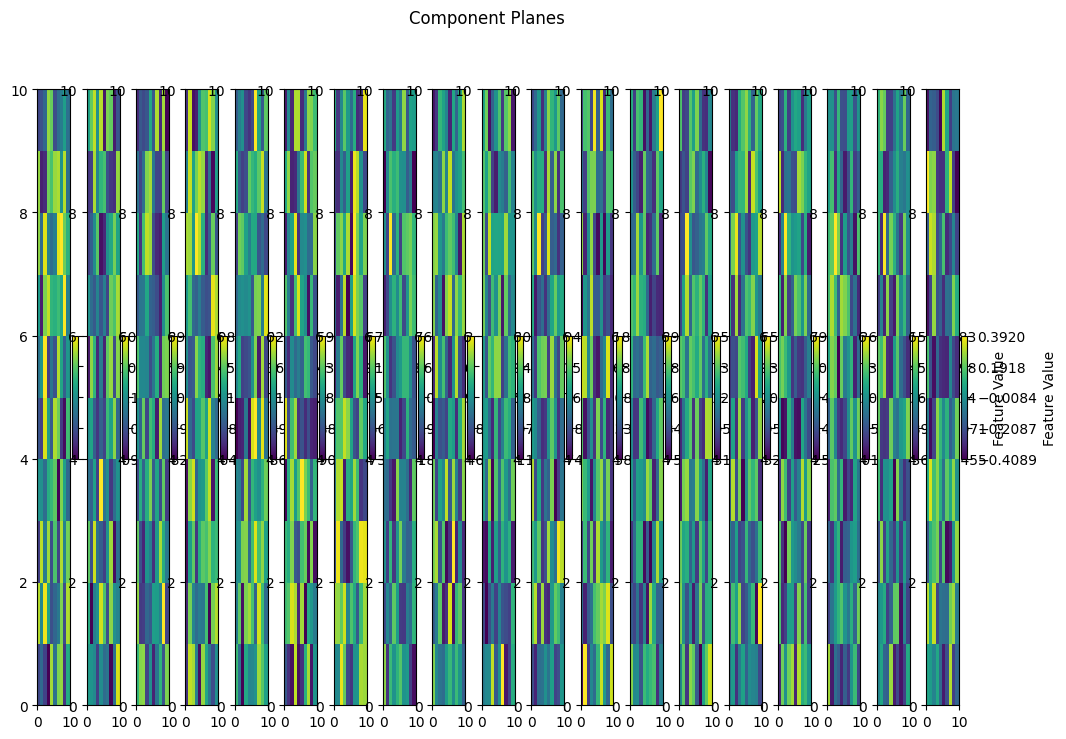

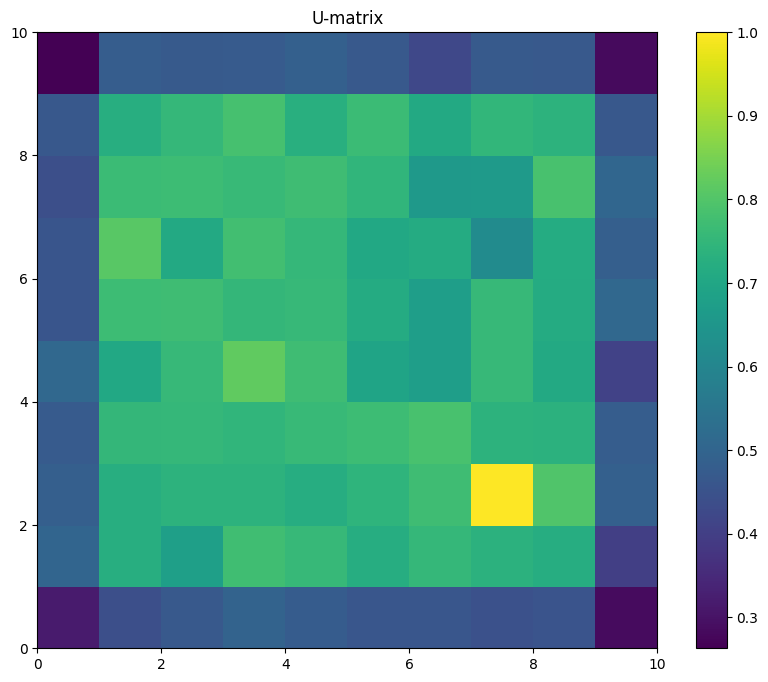

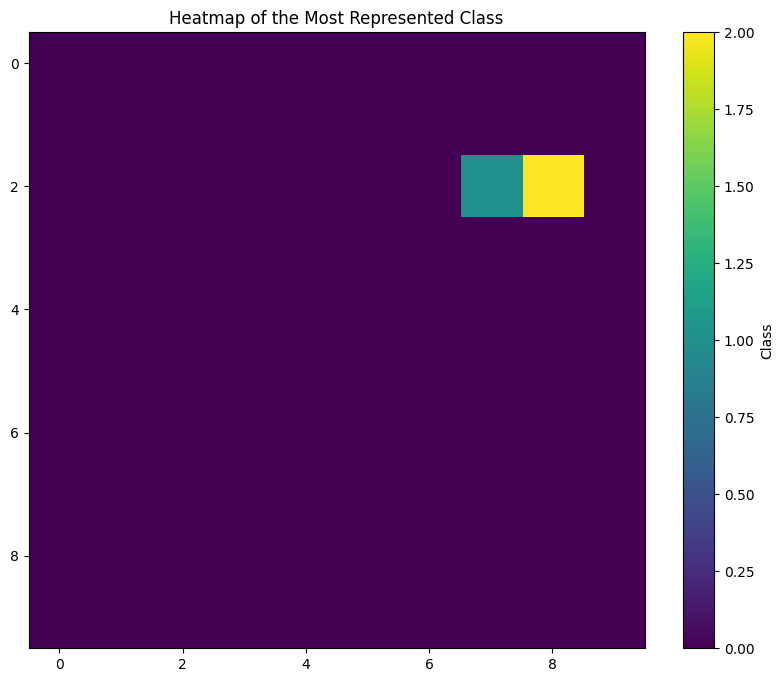

In [311]:
labels = class_eucaliptus

apply_pca(df_Eucaliptus_imputed, labels)
apply_tsne(df_Eucaliptus_imputed, labels)
apply_ahc(df_Eucaliptus_imputed, labels)
apply_kmeans(df_Eucaliptus_imputed, labels, k=5)

numeric_data = df_Eucaliptus_imputed.apply(pd.to_numeric, errors='coerce')
numeric_data = numeric_data.astype('float64')
labels_f = np.array(labels).astype('float64')
labels_f = labels_f.astype('object')
formatted_labels = [[str(label)] for label in labels_f]
formatted_labels_column = np.array(formatted_labels).reshape(-1, 1)
labels_f = formatted_labels_column.astype('object')
# Reassign the index with a new RangeIndex starting from 1
numeric_data.index = pd.RangeIndex(start=1, stop=len(numeric_data) + 1)
# Convert column names to int64
numeric_data.columns = np.arange(0, len(numeric_data.columns))
apply_som(numeric_data, labels_f)